![MAIA banner](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/Aprendizaje_refuerzo_profundo_Banner_V1.png)

# <h1><center>Tarea Tutorial - Semana 3 <a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana3_v2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width="140" align="center"/></a></center></h1>

<center><h1>Deep Q Networks</h1></center>

En este notebook se presenta una introducción práctica en detalle al algoritmo de DQN y sus variantes, como Doble DQN y QRDQN. Para ello se va a abordar un problema que se ha convertido en un estándar para la prueba de algoritmos de aprendizaje por refuerzo: jugar videojuegos de Atari. En este tutorial aprenderás sobre cómo se pueden utilizar redes neuronales convolucionales para entrenar algoritmos directamente a partir de imágenes, y sobre algunas técnicas o estrategias que se han desarrollado para mejorar el aprendizaje. Nos concentraremos específicamente en el juego <i>Freeway</i>, encontrado dentro de las librería Gymnasium, y las implementaciones de DQN ofrecidas por Stable-Baselines3.


# Tabla de Contenidos
1. [Objetivos de Aprendizaje](#scrollTo=Objetivos_de_Aprendizaje)  
2. [Marco Teórico](#scrollTo=Marco_Te_rico)  
3. [Instalación de Librerías](#scrollTo=Instalaci_n_de_Librer_as)  
4. [Familiarización con el Entorno de Gym](#scrollTo=Familiarizaci_n_con_el_Entorno_de_Gym)  
5. [DQN](#scrollTo=DQN)
7. [QR-DQN](#scrollTo=QR_DQN)  
10. [Reflexiones Finales](#scrollTo=Reflexiones_Finales)  
11. [Referencias](#scrollTo=Referencias)

# Objetivos de Aprendizaje  

A través de los ejercicios de este tutorial se busca:
  

*   Evidenciar el uso de redes neuronales convolucionales para aprender directamente de imágenes en un entorno/problema de Aprendizaje por Refuerzo.
*   Comprender las bases teóricas del funcionamiento del algoritmo de Deep Q-Networks (DQN).
*   Experimental con algunas modificaciones útiles que se aplican al algoritmo de DQN, como Doble DQN, Quantile Regression DQN (QR-DQN) o Prioritized Experience Replay, y observar sus ventajas.




# Marco Teórico  

Anteriormente, se abordó el método tabular de Q-Learning, un algoritmo de aprendizaje off-policy. En el año 2013, Minh et al. [1] publicaron un artículo donde modificaban este algoritmo para utilizar aproximación de funciones haciendo uso de redes neuronales convolucionales. Este paper introdujo así el algoritmo de Deep Q-Networks (DQN), y lo usó de forma exitosa en juegos de Atari. El algoritmo de DQN se muestra en la Figura 1 a continuación.

![DQNdF](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/DQN_dF.png)


<center>Figura 1. Algoritmo de DQN.</center>


Minh et al. utilizaron este algoritmo usando como entradas de la red neuronal convolucional imágenes de 84x84 pixeles en escala de grises, correspondientes a la secuencia de distintos juegos de Atari. La salida de la red era el valor de la función Q para cada una de las posibles acciones que puede tomar el jugador con los controles disponibles. Este paper marcó un antes y un después en el Aprendizaje por Refuerzo profundo, porque en este caso se está aprendiendo directamente a partir de las imágenes, mientras que anteriormente se empleaban representaciones lineales más sencillas o modelos diseñados específicamente para cada problema. En este caso, una misma red neuronal, modelo y parámetros se pueden utilizar para distintos juegos sin tener conocimiento previo de los mismos. Adicionalmente, en este artículo se introducen estrategias importantes como el uso de minibatches y Experience Replay. El Experience Replay consiste en guardar las experiencias pasadas del agente y usarlas posteriormente de diferentes partes del entrenamiento, rompiendo la correlación temporal de los datos. De esta manera, Minh et al. logran obtener resultados mejores en distintos juegos de Atari a comparación de métodos pasados y también logran superar en algunos casos a jugadores humanos expertos. [1]

No obstante, el algoritmo de DQN luego pasó por una serie de mejoras y cambios sugeridos en otras publicaciones. El avance más importante probablemente fue la implementación de Doble Doble DQN, propuesto en el artículo de Hasselt et al. [2] del año 2016. En Q-Learning tradicional y también en DQN, el algoritmo tiende a sobreestimar los valores de las acciones debido al sesgo de maximización, que aparece al tomar el máximo sobre acciones en la actualización de la función Q. Esta sobreestimación puede llevar a encontrar peores políticas. Para corregir este problema, en el artículo se generaliza el Doble Q-Learning (versión tabular) al algoritmo de DQN. Para ello recurren a dos redes neuronales: una red online para seleccionar las acciones, y otra red para realizar la evaluación, denominada target network. Con esto se consigue reducir la sobreestimación y mejorar la estabilidad del entrenamiento, resultando generalmente en mejores puntajes en los mismos juegos de Atari.

Otra modificación importante consiste en utilizar un Experience Replay priorizado (Prioritized Experience Replay). Esta estrategia fue propuesta por Schaul et al. [3] en 2016. Básicamente, en el Experience Replay original el agente guarda trancisiones como experiencia y las guarda al azar para romper las correlaciones temporales, pero no todas las experiencias son igual de útiles, y la repetición de trancisiones poco informativas termina realentizando el aprendizaje. Con Prioritized Experience Repaly, se utiliza la magnitud del error TD como medida de importancia, priorizando las trancisiones con mayor error TD, reproduciendo más a menudo estas experiencias para aprender más rápido. Esta priorización puede hacerse de forma proporcional al error TD o basada en la posición en un ranking.

El algoritmo de Doble DQN, con Prioritized Experience Replay proporcional, se muestra en la Figura 2.

![DobleDQNdF](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/DobleDQN_dF.png)

<center>Figura 2. Algoritmo de Doble DQN con Prioritized Experience Replay proporcional.</center>


Finalmente, en 2017, Dabney et al. [4] proponen una técnica avanzada llamada Quantile Regression Deep Q-Network (QR-DQN), que representa un enfoque distribuido al aprendizaje por refuerzo. A diferencia de algoritmos como DQN o Double DQN, que estiman únicamente el valor esperado de la recompensa futura, QR-DQN modela la distribución completa de retornos mediante una aproximación basada en cuantiles. En lugar de ajustar probabilidades sobre ubicaciones fijas, como en otros enfoques, QR-DQN fija probabilidades uniformes y aprende directamente las ubicaciones de los cuantiles, lo que permite capturar de manera más precisa la variabilidad e incertidumbre del entorno. Esta parametrización permite minimizar directamente la distancia de Wasserstein, una métrica robusta entre distribuciones, utilizando técnicas de regresión cuantílica. Además, se emplea una variante suavizada de la pérdida, conocida como quantile Huber loss, que mejora la estabilidad del entrenamiento con redes neuronales profundas. QR-DQN ha demostrado ser más robusto y eficiente que DQN, Double DQN y Prioritized Replay, tanto en términos de estabilidad durante el entrenamiento como en el rendimiento final, especialmente en entornos complejos como los juegos de Atari 2600.



# Instalación de Librerías  

Para este tutorial, siguiendo la metodología de los papers anteriormente mencionados, se va a recurrir a un juego de Atari 2600: <i>Freeway</i>. Este videojuego ya se encuentra incluido en los ambientes de Atari de la librería Gymnasium. También se utilizarán las implementaciones de DQN encontradas dentro de Stable-Baselines3.

Antes de comenzar, se sugiere elegir un entorno de simulación acelerado por GPU. En el caso de Colab gratuito, debería elegir el entorno de T4. Para ello diríjase a:

`Entorno de Ejecución > Cambiar Tipo de Entorno de Ejecución > GPU T4`


![DobleDQNdF](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/t4.png)


Después, ejecute el siguiente bloque de código para instalar todas las librerías y herramientas necesarias.


In [ ]:
#Descarga librerías no incluidas en Colab usando pip
!pip install stable_baselines3 #Stable Baselines3 -> Framework de Reinforcement Learning
!pip install sb3-contrib #SB3-Contrib es un repositorio aparte con otros algoritmos
!pip install ale-py #ALE se utiliza para el ambiente de Atari
!pip install "gymnasium[atari,accept-rom-license]" stable-baselines3 autorom renderlab -q #Gymnasium, envs de Atari y ROM
!AutoROM --accept-license
!pip install renderlab #usado para renderizar gym

#Importa estas librerías
import stable_baselines3 #importa Stable Baselines3
from stable_baselines3 import DQN #importa el agente/algoritmo de DQN
from stable_baselines3.common.logger import configure #importa herramientas de logger/debug
from stable_baselines3.common.logger import Logger, CSVOutputFormat, HumanOutputFormat #importa herramientas de logger/debug
from stable_baselines3.common.evaluation import evaluate_policy #importa herramienta de evaluación automática
from sb3_contrib import QRDQN #importa el agente/algoritmo de QRDQN
import gymnasium #importa la libreria de gymnasium con las simulaciones
import renderlab #importa renderlab para los videos

import ale_py #importa ale para los ambientes de Atari
from gymnasium.wrappers import TimeLimit #importa timelimit para acortar los episodios
from stable_baselines3.common.env_util import make_atari_env #importa make_atari_env para escala de grises
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack #importa VecFrameStack para apilar frames y acelerar así el entrenamiento
from collections import deque #importa para ajustar los videos con VecFrameStack
import cv2 #importa para ajustar los videos con VecFrameStack

#!Importante:
gymnasium.register_envs(ale_py) #Hay que registrar los entornos de ALE manualmente!!!

#Importa otras librerías básicas
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import sys

#Limpia los registros generados
from IPython.display import clear_output
clear_output()
print("Todas las librerías han sido instaladas correctamente.")

Todas las librerías han sido instaladas correctamente.


In [ ]:
import subprocess

subprocess.run(["AutoROM"], input="Y\n", text=True)


CompletedProcess(args=['AutoROM'], returncode=0)

# Familiarización con el Entorno de Gym

En el videojuego <i>Freeway</i> [5], el jugador controla a un pollo cuyo objetivo es cruzar una calle por donde constantemente pasan automóviles de un lado a otro. Cada vez que el pollo logra llegar al otro lado de la acera, obtiene un punto y regresa a la posición inicial. Una imágen del juego se muestra en la Figura 3.


![freeway](https://raw.githubusercontent.com/MAIA4361-Aprendizaje-refuerzo-profundo/Notebooks_Tareas/main/Images/freeway.png)

<center>Figura 3. Ejemplo de una partida de Freeway.</center>

En este ambiente el jugador tiene 3 posibles acciones en cada paso de tiempo:


*   0 - Se queda quieto (NOOP).
*   1 - Se mueve hacia arriba (UP).
*   2 - Se mueve hacia abajo (DOWN).

Adicionalmente, para configurar una partida de Freeway hay dos parámetros importantes: modo (mode) y dificultad (difficulty). El modo regula la cantidad de autos que se mueven en la carretera, con un número entre 0 y 7. En modo 0 hay menos autos, mientras que en el modo 7 hay más autos y son más rápidos. Por otro lado, la dificultad puede ser 0 o 1. En dificultad 0, cuando el pollo es atropellado este no regresa al inicio de la carretera, sino que sólo regresa una línea hacia atrás. Al contrario, cuando la dificultad es 1, cuando el pollo es atropellado el jugador debe reiniciar desde el inicio de la carretera.

Dado el tiempo de juego, en general un jugador humano experto puede esperar obtener una puntuación entre 20 y 25.





## Ejemplo

A continuación se muestra un ejemplo de simulación de una partida de <i>Freeway</i>. En este caso, se usa el modo 0 y dificultad 0 (ambiente más fácil posible), y siempre se dirige el pollo hacia arriba (acción en 1).

In [ ]:
#Parámetros del ambiente
mode=0
difficulty=0

env_render = gymnasium.make("ALE/Freeway-v5", render_mode="rgb_array", mode=mode, difficulty=difficulty) #Se crea el ambiente.
env_render = renderlab.RenderFrame(env_render, "./output") #Se crea una copia que se pueda renderizar con renderlab

terminated = False #Inicializa una condición para el loop
truncated = False #Inicializa una condición para el loop
total_reward=0 #Inicializa contador del retorno

obs , info = env_render.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 2 dimensiones)

while not (terminated or truncated): #Simula hasta que termine la partida
  action = 1 #Siempre va hacia arriba
  obs, reward, terminated, truncated, info = env_render.step(action) #da el paso
  total_reward+=reward #acumula recompensa

print("Recompensa obtenida en el episodio:",total_reward) #Se imprime la recompensa obtenida
print("\n\n")

env_render.play() #Con esta función se obtiene el video de la simulación

Recompensa obtenida en el episodio: 21.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## Ejercicio Práctico

En el anterior ejemplo, se puede evidenciar que el agente obtiene una puntuación muy buena (entre 20 y 25). En este caso, ir siempre hacia adelante resultó ser una buena política porque con dificultad 0 el pollito no regresa al inicio de la carretera, por lo cual termina siendo poco relevante si el pollito intenta en su lugar esquivar a los automóviles, ya que el efecto sería similar.

¿Si cambiamos la dificultad a 1, y cambiamos el modo a 7, esta estrategia resulta ser igual de efectiva?

In [ ]:
# Ejecute una partida con dificultad 1 y modo 7

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

#DQN

En primer lugar, para intentar resolver este problema, utilizaremos una versión <i>vanilla</i> de DQN, es decir, sin doble DQN ni Prioritized Experience Replay o similar, como hizo Mnih et al en 2013 [1]. Esta es la versión que se encuentra implementada dentro de Stable-Baselines3.

## Ejemplo

Iniciaremos nuevamente con el caso más sencillo posible: modo 0 y dificultad 0. A continuación, se muestra un ejemplo de cómo debe crearse el agente de DQN con una serie de parámetros optimizado, el proceso de entrenamiento y posterior render de la política. Tenga en cuenta algunos aspectos importantes:

*   Se hace uso de la función <i>make_atari_env</i> de SB3. Esta función automáticamente prepara el ambiente de Gymansium para hacer más ligero y eficiente el entrenamiento. Principalmente se encarga de convertir las imágenes del juego en escala de grises y también reescalarlas. Adicionalmente, se puede utilizar también para entrenar varios ambientes en paralelo, pero en este caso se usará únicamente un ambiente.
*   Se hace uso de la función <i>VecFrameStack</i> de SB3. Cuando se usa una única imágen como entrada de la red neuronal, no se tiene información sobre velocidad o dirección de movimiento, por lo cual conviene usar esta función para apilar varios frames y tener mayor información en el entrenamiento. Esto permite realizar entrenamientos en tiempos más cortos, lo cual es importante si se trabaja en una sesión de colab. En este caso, se apilarán 4 frames.
*   Como se apilan 4 frames, las dimensiones del modelo cambian con respecto a las de la familiarización anterior. Por ende, se requieren hacer unos ajustes manuales para que el video sea un continuo y no se vea recortado cada 4 frames.
*   Como la entrada son imágenes, se debe trabajar con una política <i>CnnPolicy</i> (Convolutional Neural Networks).
*   El tamaño de buffer se ve limitado por la sesión de Colab. Por defecto está en 100,000, y la RAM no es suficiente para esto con una sesión gratuita. Para evitar errores, se recomienda reducirlo a 50,000.
*   Se recomienda usar el entorno de ejecución acelerado por GPU T4 (disponible en la versión gratuita).
*   Se muestran unos logs de entrenamiento cada 5 epidosios y después el video.
*   El modelo entrenado se guarda temporalmente en la sesión de Colab como un archivo .zip, el cual puede cargar en otras celdas. También puede descargarlo y volverlo a subir en otra sesión para no tener que volver a entrenar un modelo.  

`Tiempo aproximado que demora el entrenamiento: 10 minutos`


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.logger import configure
from stable_baselines3.common.callbacks import BaseCallback
from collections import deque
import cv2
import gymnasium
import renderlab  # Ensure this is your custom render wrapper
from stable_baselines3.common.vec_env import VecFrameStack


In [ ]:
# Callback personalizado para registrar las recompensas por episodio durante el entrenamiento
class RewardLoggerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []  # Lista para almacenar las recompensas de cada episodio

    def _on_step(self) -> bool:
        # Verifica si hay información de episodios en los 'infos' proporcionados por el entorno
        if len(self.locals["infos"]) > 0:
            for info in self.locals["infos"]:
                if "episode" in info:
                    # Agrega la recompensa del episodio a la lista
                    self.episode_rewards.append(info["episode"]["r"])
        return True  # Continúa el entrenamiento

# Clase encargada de entrenar al agente en el entorno Freeway
class FreewayTrainer:
    def __init__(self, model_fn, mode=0, difficulty=0, total_timesteps=204_800, log_dir="./logs"):
        self.mode = mode  # Modo del entorno (por defecto 0)
        self.difficulty = difficulty  # Dificultad del entorno (por defecto 0)
        self.total_timesteps = total_timesteps  # Número total de pasos de entrenamiento
        self.log_dir = log_dir  # Carpeta donde se almacenan los logs
        os.makedirs(log_dir, exist_ok=True)  # Crea la carpeta si no existe

        # Crea el entorno Atari con envolturas necesarias
        env = make_atari_env(
            "ALE/Freeway-v5",
            n_envs=1,
            seed=0,
            env_kwargs={"mode": self.mode, "difficulty": self.difficulty}
        )
        env = VecFrameStack(env, n_stack=4)  # Apila 4 frames para entradas más ricas
        env.envs[0] = Monitor(env.envs[0], filename=os.path.join(log_dir, "monitor.csv"))  # Guarda estadísticas del entorno

        self.env = env
        self.model = model_fn(self.env)  # Crea el modelo usando la función proporcionada

        # Configura un logger personalizado que guarda en consola y en CSV
        new_logger = configure(log_dir, ["stdout", "csv"])
        self.model.set_logger(new_logger)

        # Instancia del callback para registrar recompensas
        self.callback = RewardLoggerCallback()

    def train(self, save_path="dqn_freeway_model"):
        # Entrena el modelo y guarda el archivo resultante
        self.model.learn(total_timesteps=self.total_timesteps, log_interval=20, callback=self.callback)
        self.model.save(save_path)
        print("Training complete. Model saved.")  # Mensaje al finalizar

    def plot_rewards(self):
        # Grafica la evolución de las recompensas por episodio
        if not self.callback.episode_rewards:
            print("No reward data to plot.")  # Si no hay datos, notifica
            return
        plt.figure(figsize=(10, 5))
        plt.plot(self.callback.episode_rewards, label="Episode Reward")
        plt.xlabel("Episodes")
        plt.ylabel("Reward")
        plt.title("Training Rewards Over Time")
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()

    def generate_video(self, model_path="dqn_freeway_model"):
        # Carga el modelo entrenado y genera un video del agente actuando
        model = self.model.__class__.load(model_path)

        # Crea el entorno con modo de renderizado RGB para capturar imágenes
        env = gymnasium.make("ALE/Freeway-v5", render_mode="rgb_array", mode=self.mode, difficulty=self.difficulty)
        env = renderlab.RenderFrame(env, "./output")  # Envuelve el entorno para capturar video

        frame_stack = deque(maxlen=4)  # Pila de frames para mantener la entrada en el mismo formato que durante el entrenamiento

        # Función para preprocesar las observaciones: convierte a escala de grises y redimensiona
        def preprocess(obs):
            gray = obs.mean(axis=2).astype(np.uint8)
            resized = cv2.resize(gray, (84, 84), interpolation=cv2.INTER_AREA)
            return resized

        obs, info = env.reset()
        preprocessed = preprocess(obs)
        for _ in range(4):
            frame_stack.append(preprocessed)  # Inicializa la pila con los primeros 4 frames

        terminated = False
        truncated = False
        total_reward = 0  # Acumula la recompensa total del episodio

        # Ejecuta el episodio hasta que termine
        while not (terminated or truncated):
            stacked_obs = np.stack(frame_stack, axis=0)  # Apila los frames para la entrada del modelo
            action, _ = model.predict(stacked_obs, deterministic=True)  # Predice la acción a tomar

            obs, reward, terminated, truncated, info = env.step(action)  # Ejecuta la acción
            total_reward += reward  # Acumula la recompensa

            preprocessed = preprocess(obs)  # Preprocesa la nueva observación
            frame_stack.append(preprocessed)  # Actualiza la pila de frames

        print("Recompensa obtenida en el episodio:", total_reward)  # Muestra la recompensa obtenida
        env.play()  # Reproduce el video generado



Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to ./logs
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 0.25     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 158      |
|    time_elapsed     | 64       |
|    total_timesteps  | 10178    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.31e-10 |
|    n_updates        | 2288     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 1.77     |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 156      |
|    time_elapsed     | 130      |
|    total_timesteps  | 20353    |
| train/              |          |
|    learning

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


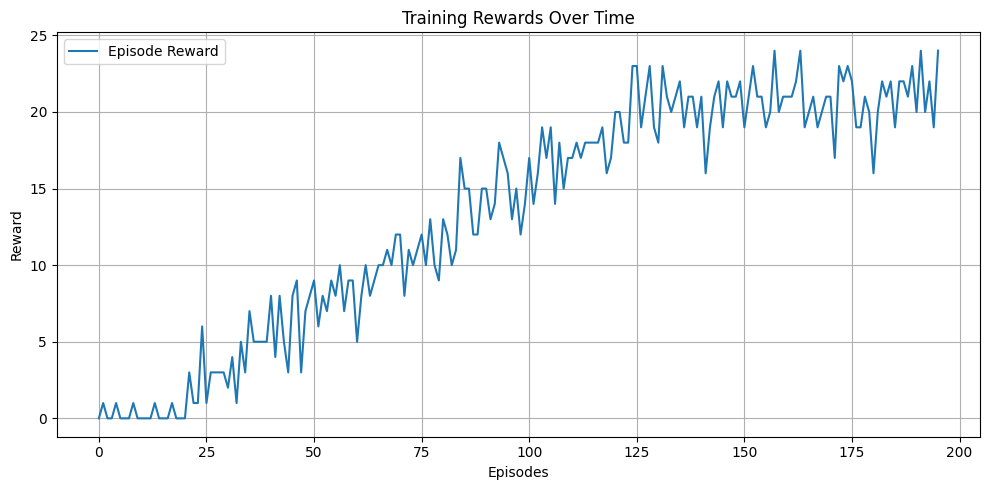

In [ ]:
def create_model(env):
    return DQN(
        "CnnPolicy",
        env,
        learning_rate=0.0001,
        buffer_size=50000,
        learning_starts=1024,
        batch_size=32,
        gamma=0.99,
        train_freq=4,
        target_update_interval=10000,
        exploration_fraction=0.7,
        exploration_initial_eps=1.0,
        exploration_final_eps=0.05,
        verbose=1
    )

trainer = FreewayTrainer(model_fn=create_model, mode=0, difficulty=0, total_timesteps=100_000)
trainer.train()
trainer.generate_video()
trainer.plot_rewards()

## Ejercicio Práctico

Se puede observar en el ejemplo anterior que el pollito termina yendo siempre hacia adelante, obteniendo una recompensa igual o muy similar a la obtenida anteriormente en el proceso de familiarización. Esto no significa que la política sea mala, pero en definitiva el algoritmo de DQN no es muy útil en este caso. Evaluemos mejor su desempeño con otros parámetros. Repita los entrenamientos cambiando los parámetros:

*   modo 0 y dificultad 1.
*   modo 7 y dificultad 1.

También puede ajustar algunos de los siguientes parámetros del modelo y entrenamiento para intentar obtener mejores resultados:

*   <i>learning_rate</i>: La tasa de aprendizaje.
*   <i>batch_size</i>: Cantidad de experiencias almacenadas en el Experience Replay.
*   <i>exploration_fraction</i>: Porcentaje del entrenamiento en el cual el agente reduce progresivamente su tasa de exploración ($\epsilon$).
*   <i>exploration_final_eps</i>: La tasa de exploración ($\epsilon$) que mantendrá el agente al final.
*   <i>total_timesteps</i>: Equivalente al tiempo de entrenamiento.

In [ ]:
# Con base en el ejemplo entrene un agente con el algoritmo de DQN para una dificultad de 1 y modo 0

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Con base en el ejemplo entrene un agente con el algoritmo de DQN para una dificultad de 1 y modo 7

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

# **QR-DQN**

Ahora procederemos a usar una de las variantes más recientes de DQN: Quantile Regression DQN. Este algoritmo se encuentra en Stable-Baselines3 Contrib (que existe como una unidad aparte de SB3, y continene una serie de algoritmos un poco más experimentales).

La implementación de QR-DQN ya incluye por defecto en su programación la estrategia de Doble DQN de utilizar dos redes por separado para separar el proceso de decisión de la actualización (redes de comportamiento y target). Por lo cual en esta implementación observaremos las ventajas de ambas estrategias en un sólo ejemplo.

Adicionalmente, en este caso se duplican los pasos de entrenamiento, y se vuelve a suministrar un modelo con parámetros optimizados. Tenga en cuenta las observaciones y recomendaciones dadas anteriormente.

## Ejemplo
Omitiendo el caso de modo 0 y dificultad 0, que comienza a ser trivial, probaremos ahora el caso de modo 0 y dificultad 1.

`Tiempo aproximado que demora el entrenamiento: 20 minutos`

Using cuda device
Wrapping the env in a VecTransposeImage.
Logging to ./logs
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 137      |
|    time_elapsed     | 73       |
|    total_timesteps  | 10178    |
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 1.99     |
|    n_updates        | 2288     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 509      |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 40       |
|    fps              | 135      |
|    time_elapsed     | 150      |
|    total_timesteps  | 20353    |
| train/              |          |
|    learning

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


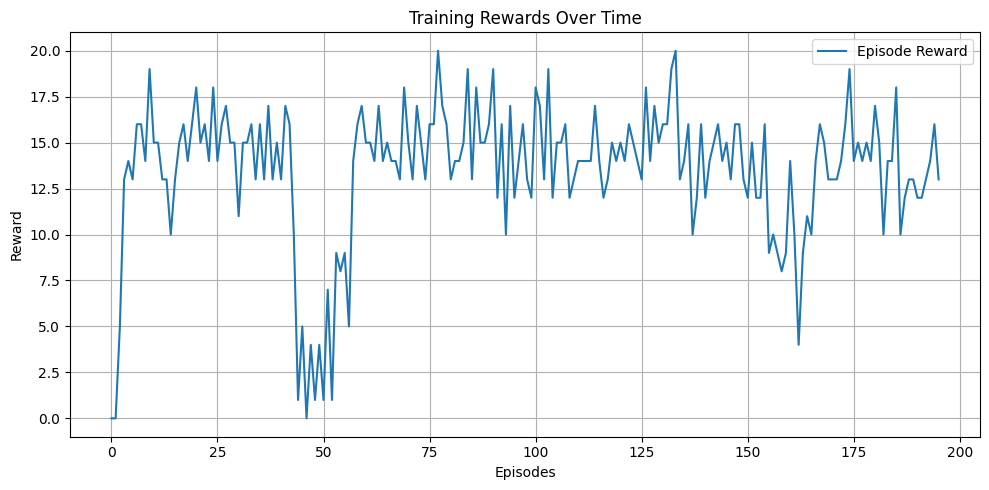

In [ ]:
def create_qrdqn_model(env):
    return QRDQN(
        "CnnPolicy",
        env,
        learning_rate=5e-5,
        buffer_size=50000,
        learning_starts=1024,
        batch_size=64,
        gamma=0.995,
        train_freq=4,
        target_update_interval=1000,
        exploration_fraction=0.005,
        exploration_initial_eps=1.0,
        exploration_final_eps=0.01,
        policy_kwargs=dict(n_quantiles=101),
        verbose=1
    )

trainer = FreewayTrainer(model_fn=create_qrdqn_model, mode=0, difficulty=1, total_timesteps=100_000)
trainer.train()
trainer.generate_video()
trainer.plot_rewards()

## Ejercicio Práctico

En el ejemplo anterior, se observa que se obtiene una recompensa cercana a 20. Esto es positivo, dado que entocnes el desempeño es entonces similar a cuando se jugaba con dificultad 0. Adicionalmente, hay una diferencia fundamental en la política observada en el video: el pollito ya no va siempre derecho, ahora frecuentemente se detiene, esperando a que pasen vehículos, y también retrocede para esquivarlos, algo que no se estaba observando con el DQN puro.

Repita el entrenamiento cambiando los parámetros:

*   modo 7 y dificultad 1.

También puede ajustar algunos de los siguientes parámetros del modelo y entrenamiento para intentar obtener mejores resultados:

*   <i>learning_rate</i>: La tasa de aprendizaje.
*   <i>batch_size</i>: Cantidad de experiencias almacenadas en el Experience Replay.
*   <i>exploration_fraction</i>: Porcentaje del entrenamiento en el cual el agente reduce progresivamente su tasa de exploración ($\epsilon$).
*   <i>exploration_final_eps</i>: La tasa de exploración ($\epsilon$) que mantendrá el agente al final.
*   <i>total_timesteps</i>: Equivalente al tiempo de entrenamiento.

In [ ]:
# Con base en el ejemplo entrene un agente con el algoritmo de QR-DQN para una dificultad de 1 y modo 7

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

# Reflexiones Finales

Ahora que observó los resultados usando las diferentes versiones de DQN, puede reflexionar sobre las siguientes preguntas. Tenga en cuenta que, para algunos juegos de Atari, pueden ser necesarios millones de pasos y horas de entrenamiento, mientras que aquí únicamente se invirtieron algunos minutos. Teniendo en cuenta la limitante de tiempo:

*   ¿Es mejor usar DQN, o utilizar otra versión como QR-DQN o Doble DQN?


*   ¿Cómo afecta la exploración en este caso?



*   ¿Cómo afecta el tamaño de batch al entrenamiento?


*   ¿Por qué es importante usar redes neuronales convolucionales? ¿y por qué es importante usar escala de grises y apilar frames?






# Referencias

[1] Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., and Riedmiller, M. (2013). Playing atari with deep reinforcement learning. cite arxiv:1312.5602Comment: NIPS Deep Learning Workshop 2013.

[2] Hasselt, H. v., Guez, A., and Silver, D. (2016). Deep reinforcement
learning with double q-learning. In Proceedings of the Thirtieth AAAI Conference on Artificial Intelligence, AAAI'16, pages 2094-2100. AAAI Press.

[3] Schaul, T., Quan, J., Antonoglou, I., and Silver, D. (2015). Prioritized experience replay. cite arxiv:1511.05952Comment: Under review as a conference paper at ICLR 2016.

[4] Dabney, W., Rowland, M., Bellemare, M. G., and Munos, R. (2017). Distributional reinforcement learning with quantile regression. cite arxiv:1710.10044Comment: Published at AAAI 2018.

[5] Gym Documentation, Freeway. `https://gymnasium.farama.org/v0.28.1/environments/atari/freeway/`

[6] Stable Baselines3 Documentation, DQN. `https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html`